In [1]:
import pandas as pd
import numpy as np
import ppscore as pps
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as stats
import time

In [2]:
pd.set_option('display.max_columns', None)
df_td = pd.read_csv('tic_2000_train_data.csv')
eval1 = pd.read_csv('tic_2000_eval_data.csv')
target = pd.read_csv('tic_2000_target_data.csv')
#https://www.kaggle.com/kushshah95/the-insurance-company-tic-benchmark

In [3]:
#First looking at the data, it is evident there is a definate imbalnace in the target variable
#Possible remedies include: Oversampling/undersampling, Data Augmentation, or using a 5-1 ratio in data for model training
print('Target feature in Training Data; Balance', '\n',df_td.CARAVAN.value_counts())
print('Target feature in Target Data; Balance', '\n',target.Target.value_counts())
#No missing values, and all equal head counts.
print('Training Features Dataset; Shape', df_td.shape)
print('Eval Features Dataset; Shape', eval1.shape)
print('Target Feature Dataset; Shape', target.shape)

Target feature in Training Data; Balance 
 0    5474
1     348
Name: CARAVAN, dtype: int64
Target feature in Target Data; Balance 
 0    3762
1     238
Name: Target, dtype: int64
Training Features Dataset; Shape (5822, 86)
Eval Features Dataset; Shape (4000, 85)
Target Feature Dataset; Shape (4000, 1)


In [4]:
df_td.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.00000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,0.883545,2.290450,1.887667,3.230333,4.300240,1.461010,3.351254,4.572484,1.895053,0.397973,0.522329,2.899004,2.219856,2.306424,1.620749,1.606836,2.202508,3.758674,1.067331,4.236860,4.771728,6.040364,1.316386,1.959464,6.277053,2.728959,2.573686,3.536070,2.731364,0.796118,0.202679,3.784438,4.236345,0.771213,0.040021,0.071625,2.970457,0.048265,0.175369,0.009447,0.020955,0.092580,0.013054,0.215046,0.194778,0.013741,0.015287,0.023531,1.827722,0.000859,0.018894,0.025249,0.01563,0.047578,0.402954,0.014772,0.020611,0.562178,0.010477,0.041051,0.002233,0.012539,0.033665,0.006183,0.070423,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,0.965924,1.722645,1.799928,1.619973,2.005283,1.622967,1.761052,2.298125,1.798321,0.775073,1.056926,1.839675,1.730840,1.692843,1.722882,1.330664,1.529319,1.935568,1.303175,3.089302,3.089837,1.552799,1.203072,1.599714,1.978675,1.981893,2.086099,1.882656,1.927738,1.162829,0.551557,1.317783,2.007150,0.958623,0.362680,0.499980,2.920669,0.531346,0.897222,0.244675,0.212738,0.603076,0.228906,0.813133,0.898100,0.209260,0.192471,0.375274,1.879290,0.043462,0.273028,0.156894,0.20456,0.409016,0.492631,0.134133,0.142092,0.604767,0.129991,0.228974,0.062819,0.125775,0.240755,0.124189,0.265112,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

##### Several notable items in the datasets above

In [5]:
#renaming variables to easy reading
df_td.rename(columns={'MOSTYPE': 'subtype_L0', 'MAANTHUI':'Num_houses', 'MGEMOMV' : 'Avg_hh_size',
                   'MGEMLEEF':'age_L1', 'MOSHOOFD': 'maintype_L2', 'MGODRK': 'romcath_L3',
                   'MGODPR': 'Protestant','MGODOV' : 'O_religion', 'MGODGE': 'N_religion','MRELGE' :'Married',
                   'MRELSA' : 'Living_together','MRELOV' : 'O_relation','MFALLEEN' : 'Singles','MFGEKIND' : 'hh_wo_child',
                   'MFWEKIND' : 'hh_w_child','MOPLHOOG' : 'H_lvl_edu','MOPLMIDD' : 'M_lvl_edu',
                   'MOPLLAAG' : 'L_lvl_edu','MBERHOOG' : 'H_status','MBERZELF' : 'Entrepreneur','MBERBOER' : 'Farmer',
                   'MBERMIDD' : 'Mid_management','MBERARBG' : 'Skld_labor','MBERARBO' : 'Unskld_labor',
                   'MSKA' : 'Soc_cls_A','MSKB1' : 'Soc_cls_B1','MSKB2' : 'Soc_cls_B2','MSKC' : 'Soc_cls_C',
                   'MSKD' : 'Soc_cls_D','MHHUUR' : 'R_house','MHKOOP' : 'O_house','MAUT1' : '1_car','MAUT2' : '2_cars',
                   'MAUT0' : 'N_car','MZFONDS' : 'Nat_Hlth_Serv','MZPART' : 'Prv_Hlth_Insur','MINKM30' : 'Inc_u_30k',
                   'MINK3045' : 'Inc_btw_30_45k','MINK4575' : 'Inc_btw_45_75k','MINK7512' : 'Inc_75_122k','MINK123M' : 'Inc_ovr_123k',
                   'MINKGEM' : 'Avg_inc','MKOOPKLA' : 'PP_cls','PWAPART' : 'Contri_prv_3p_insur_L4','PWABEDR' : 'Firm_Contri_3p_ insur',
                   'PWALAND' : 'Ag_Contri_3p_insur','PPERSAUT' : 'Contri_car_pol','PBESAUT' : 'Contri_deliv_van_pol',
                   'PMOTSCO' : 'Contri_motorcycle/scooter_pol','PVRAAUT' : 'Contri_lorry_pol','PAANHANG' : 'Contri_trailer_pols',
                   'PTRACTOR' : 'Contri_tractor_pol','PWERKT' : 'Contri_ag_machine_pol','PBROM' : 'Contri_moped_pol',
                   'PLEVEN' : 'Contri_life_insur','PPERSONG' : 'Contri_prv_accid_insur_pol',
                   'PGEZONG' : 'Contri_fam_accid_insur_pol','PWAOREG' : 'Contri_disabl_insur_pol','PBRAND' : 'Contri_fire_pol',
                   'PZEILPL' : 'Contri_surfb_pol','PPLEZIER' : 'Contri_boat_pol','PFIETS' : 'Contri_bike_pol',
                   'PINBOED' : 'Contri_prop_insur_pol','PBYSTAND' : 'Contri_ss_insur_polo','AWAPART' : 'Num_prv_3p_insur',
                   'AWABEDR' : 'Num_firm_3p_insur','AWALAND' : 'Num_ag_3p_insur','APERSAUT' : 'Num_car_pol',
                   'ABESAUT' : 'Num_deliv_van_pol','AMOTSCO' : 'Num_motorcycle/scooter_pol', 'AVRAAUT' : 'Num_lorry_pol','AAANHANG': 'Num_trailer_pol',
                   'ATRACTOR' : 'Num_tractor_pol','AWERKT' : 'Num_ag_machines_pol','ABROM' : 'Num_moped_pol',
                   'ALEVEN' : 'Num_life_insur_pol', 'APERSONG' : 'Num_prv_accid_insur_pol','AGEZONG' : 'Num_fam_ccid_insur_pol',
                   'AWAOREG' : 'Num_disabl_insur_pol','ABRAND' :'Num_fire_pol','AZEILPL' :'Num_surfb_pol','APLEZIER' :'Num_boat_pol',
                   'AFIETS' :'Num_bike_pol','AINBOED' :'Num_prop_insur_pol','ABYSTAND' :'num_ss_insur_pol','CARAVAN' :'Target'},
          inplace=True)

In [6]:
#Dataset had been pre-encoded to remove strings, but further improvements can be made to make the data more readable.
df_td.head()

,subtype_L0,Num_houses,Avg_hh_size,age_L1,maintype_L2,romcath_L3,Protestant,O_religion,N_religion,Married,Living_together,O_relation,Singles,hh_wo_child,hh_w_child,H_lvl_edu,M_lvl_edu,L_lvl_edu,H_status,Entrepreneur,Farmer,Mid_management,Skld_labor,Unskld_labor,Soc_cls_A,Soc_cls_B1,Soc_cls_B2,Soc_cls_C,Soc_cls_D,R_house,O_house,1_car,2_cars,N_car,Nat_Hlth_Serv,Prv_Hlth_Insur,Inc_u_30k,Inc_btw_30_45k,Inc_btw_45_75k,Inc_75_122k,Inc_ovr_123k,Avg_inc,PP_cls,Contri_prv_3p_insur_L4,Firm_Contri_3p_ insur,Ag_Contri_3p_insur,Contri_car_pol,Contri_deliv_van_pol,Contri_motorcycle/scooter_pol,Contri_lorry_pol,Contri_trailer_pols,Contri_tractor_pol,Contri_ag_machine_pol,Contri_moped_pol,Contri_life_insur,Contri_prv_accid_insur_pol,Contri_fam_accid_insur_pol,Contri_disabl_insur_pol,Contri_fire_pol,Contri_surfb_pol,Contri_boat_pol,Contri_bike_pol,Contri_prop_insur_pol,Contri_ss_insur_polo,Num_prv_3p_insur,Num_firm_3p_insur,Num_ag_3p_insur,Num_car_pol,Num_deliv_van_pol,Num_motorcycle/scooter_pol,Num_lorry_pol,Num_trailer_pol,Num_tractor_pol,Num_ag_machines_pol,Num_moped_pol,Num_life_insur_pol,Num_prv_accid_insur_pol,Num_fam_ccid_insur_pol,Num_disabl_insur_pol,Num_fire_pol,Num_surfb_pol,Num_boat_pol,Num_bike_pol,Num_prop_insur_pol,num_ss_insur_pol,Target
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# Dry run test of different algorithms to see their effects

In [15]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, plot_roc_curve, classification_report, balanced_accuracy_score, coverage_error
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


def model_comp(df):
    classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    ]
    
    # Separating out the features
    x =  df.drop('Target', axis=1) #df_td.drop('Target', axis=1)# train_feat
    # Separating out the target
    y = df.Target #df_td.Target#target_feat
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)    
    
    for classifier in classifiers:
        model = classifier.fit(X_train, y_train)
        predictions = classifier.predict(X_test)
        print(classifier)
        print("accuracy score" '\n', accuracy_score(y_test, predictions))
        print("balanced_accuracy_score" '\n', balanced_accuracy_score(y_test, predictions))
        print("model confusion matrix" '\n', confusion_matrix(y_test, predictions, normalize='all'))
        print("classification_report" '\n', classification_report(y_test, predictions),'\n')
        ax = plt.gca()
        disp = plot_roc_curve(classifier, X_test, y_test, ax=ax, alpha=0.9)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
accuracy score
 0.9244635193133047
balanced_accuracy_score
 0.5024828026058038
model confusion matrix
 [[9.23605150e-01 6.86695279e-03]
 [6.86695279e-02 8.58369099e-04]]
classification_report
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1084
           1       0.11      0.01      0.02        81

    accuracy                           0.92      1165
   macro avg       0.52      0.50      0.49      1165
weighted avg       0.87      0.92      0.90      1165
 

SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
accuracy score
 0.9304721030042918
balan

/Users/brendanganji/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianProcessClassifier(copy_X_train=True, kernel=1**2 * RBF(length_scale=1),
                          max_iter_predict=100, multi_class='one_vs_rest',
                          n_jobs=None, n_restarts_optimizer=0,
                          optimizer='fmin_l_bfgs_b', random_state=None,
                          warm_start=False)
accuracy score
 0.7141630901287553
balanced_accuracy_score
 0.6693430823197121
model confusion matrix
 [[0.67124464 0.25922747]
 [0.02660944 0.04291845]]
classification_report
               precision    recall  f1-score   support

           0       0.96      0.72      0.82      1084
           1       0.14      0.62      0.23        81

    accuracy                           0.71      1165
   macro avg       0.55      0.67      0.53      1165
weighted avg       0.90      0.71      0.78      1165
 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
      

/Users/brendanganji/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
accuracy score
 0.263519313304721
balanced_accuracy_score
 0.5528392783927839
model confusion matrix
 [[0.20171674 0.72875536]
 [0.00772532 0.06180258]]
classification_report
               precision    recall  f1-score   support

           0       0.96      0.22      0.35      1084
           1      

/Users/brendanganji/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brendanganji/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brendanganji/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/brendanganji/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and

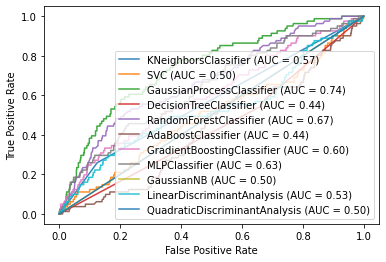

In [16]:
model_comp(df_td)

In [ ]:
#Creating a quick function to find occurances of the target variable
def find_target(df):
    has_target = df['Target']==1
    df_w_target = df[has_target]
    return df_w_target

In [ ]:
#Creating function which sorts and filters and ranks the strongest relationships
def rel_str(df):
    pps_matrix = df.abs()
    rel_str = (pps_matrix.where(np.triu(np.ones(df.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
    print("The medium/strong relationships are:", '\n', rel_str[rel_str>0.1])

In [ ]:
#Creating PPS heatmap chart
def heatmap(df):
    plt.figure(figsize=(75,75))
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap='coolwarm', linewidths=0.5, annot=True)
    ax.set_title('PPS matrix')
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    return ax, rel_str(df)

In [ ]:
# Creating Corr heatmap chart
def corr_heatmap(df):
    plt.figure(figsize=(75,75))
    ax = sns.heatmap(df, vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title('Correlation matrix')
    return ax

# Split data into Socio-economic demographics and Policy Ownership Characteristics

In [ ]:
#To get a better understanding of the data, I am splitting it into two different groups: 
# Socio-Economic Demographics and Policy Ownership
#including target variable 'CARAVAN' to see if any relationships exist between the two groups of training features and target data

#Socio-econ-demographics
soecdem_df = df_td.drop(df_td.iloc[:, 43:85], axis = 1)
#Policy Ownership
prod_own_df = df_td.drop(df_td.iloc[:, 0:43], axis = 1)

In [ ]:
#including target variable in both situations
print(soecdem_df.shape, prod_own_df.shape)

In [ ]:
#To deal with the initial imbalance seen previously, I will isolate the information to see what they have in commone first.

find_target(soecdem_df)

In [ ]:
find_target(prod_own_df)

Visualizing what other variables of those who with insurance policies have in common

In [ ]:
# Using SweetViz for visualizing the overall data to determine where to further investigate
#You will need to have a full screen to see whats on the right side.
import sweetviz as sv
#config reports
#Configuring the reports, early attempts automatically catagorized MOSTYPE and PWAPART as numberical rather than categorical
cfg_1 = sv.FeatureConfig(force_cat=['subtype_L0'])
cfg_2 = sv.FeatureConfig(force_cat=['Contri_prv_3p_insur_L4'])

In [ ]:
# You will have to close one of the previous reports, this program is limited to 2 reports per browser at a time.
#Comparing all data to each other and the target variable
report_combined = sv.analyze([find_target(df_td), "Combined"], target_feat = "Target", feat_cfg = cfg_1)
report_combined.show_html("Report_Combined.html")

In [ ]:
#Comparing Socio-Economic Demographics to the target variable CARAVAN
report_soec = sv.analyze([find_target(soecdem_df), "Socio Demographics"], target_feat= "Target", feat_cfg = cfg_1)
report_soec.show_html("Report_soec.html")

In [ ]:
#Comparing the Policy ownership demographics to the target variable CARAVAN
report_own = sv.analyze([find_target(prod_own_df), "Product Ownership"], target_feat= "Target", feat_cfg = cfg_2)
report_own.show_html("Report_PrdOwn.html")

## A few interesting observations could be made that quickly narrow down the search:

First, in the Policy Ownership report, we can imediately see that many




In [ ]:
#First I am encoding the features that have a secondary catagorical variable. 
pre_enc_soec= ['subtype_L0', 'age_L1', 'maintype_L2', 'romcath_L3']
post_enc_so_df = pd.get_dummies(soecdem_df, prefix_sep="_", columns=pre_enc_soec)

In [ ]:
post_enc_so_df

In [ ]:
post_enc_so_df.shape

In [ ]:
pre_enc_own = ['Contri_prv_3p_insur_L4']
post_enc_own_df = pd.get_dummies(prod_own_df, prefix_sep="_", columns=pre_enc_own)

In [ ]:
post_enc_own_df

In [ ]:
post_enc_own_df.shape

In [ ]:
#Taking the data we have, creating 2 sets of training data and setting our target variable to see the relationships for the PPS table

train_soecdem_feat = post_enc_so_df.drop('Target', axis=1)
train_polown_feat = post_enc_own_df.drop('Target', axis=1)
target_feat = post_enc_so_df.Target

In [ ]:
#Original dataset set
pre_enc= ['subtype_L0', 'age_L1', 'maintype_L2', 'romcath_L3', 'Contri_prv_3p_insur_L4']
post_enc_df = pd.get_dummies(df_td, prefix_sep="_", columns=pre_enc)

## Creating a PPS and Correlation Matrix to understand the data

## Explanation of using PPS matrix over Correlation matrix:

##### Correlation often fails to capture the whole story of the relationships between features. Using Predictive Probability Score (PPS), viewing how the relationship really works becomes a relatively simpler task.

For example:

In the PPS Matrix: MKOOPKLA (Purchasing power class), is a strong predictor (0.69) of MOSTYPE_8 (Modern, complete families" subtype), but not vice versa (0.076)

However, in the Correlation Matrix: MKOOPKLA's strength of the relationhip to MOSTYPE_8 is weak/medium (0.35)

In the heatmaps above, there are several things we can take note of. 

In [ ]:
#Creating the PPS matrix of Socio-economic Demographics with Target Variable CARAVAN
df_matrix_soec = pps.matrix(post_enc_so_df)

# PPS Matrix heatmap for Socio-economic Demographics
heatmap(df_matrix_soec)

In [ ]:
corr_heatmap(find_target(post_enc_so_df))

In [ ]:
#Creating PPS matrix for Policy Ownership data including the target variable
df_matrix_own = pps.matrix(post_enc_own_df)

#Heatmap of PPS Policy Ownership data
heatmap(df_matrix_own)

In [ ]:
#Applying to entire dataset
df_matrix_td = pps.matrix(post_enc_df)

#PPS matrix heatmap
heatmap(df_matrix_td)

### Due to the heavy imbalance as previously mentioned, the data will have to be modified in order to help train the model. This will cause a degree of overfitting, but will make decifering the information easier.

In [ ]:
from sklearn.utils import resample

#Creating a 5-1 ratio to test how this effects that data.
# separate minority and majority classes
no_policy = post_enc_df[post_enc_df.CARAVAN==0][:1740]
has_policy = post_enc_df[post_enc_df.CARAVAN==1]

# combine majority and upsampled minority
upsampled = pd.concat([no_policy, has_policy])

new_df = upsampled.sample(frac=1)

# check new class counts
print(new_df.CARAVAN.value_counts())
print(new_df.shape)

In [ ]:
new_df.head()

In [ ]:
new_df_matrix = pps.matrix(new_df)

In [ ]:
heatmap(new_df_matrix)

In [ ]:
print(post_enc_df.shape)
print(post_enc_df.Target.value_counts())

In [ ]:
# sliced the data into its main features

# Train-test-split

In [ ]:
# Separating out the features
x =  post_enc_df.drop('Target', axis=1) #df_td.drop('Target', axis=1)# train_feat
# Separating out the target
y = post_enc_df.Target #df_td.Target#target_feat

In [ ]:
print(x.shape)
print(y.shape)

In [ ]:
#First split the data and create upsampled data set.
from sklearn.model_selection import train_test_split


#Create training data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# Performing standardization before applying PCA
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
print(X_train)

# Run PCA to find components

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

pca = PCA(.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=92, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
## It will give eigen values
print(pca.explained_variance_)

X_train_pca = pca.transform(X_train)
print("original shape:   ", X_train.shape)
print("transformed shape:", X_train_pca.shape)

X_test_pca = pca.transform(X_test)
print("original shape:   ", X_test.shape)
print("transformed shape:", X_test_pca.shape)

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

In [ ]:
features_n = range(pca.n_components_)
pd.DataFrame(pca.components_, columns=x.columns, index=['pc_1', 'pc_2', 'pc_3','pc_4','pc_5','pc_6','pc_7','pc_8','pc_9','pc_10','pc_11','pc_12','pc_13','pc_14',
                         'pc_15','pc_16','pc_17','pc_18','pc_19','pc_20','pc_21','pc_22','pc_23','pc_24','pc_25','pc_26','pc_27','pc_28',
                         'pc_29','pc_30','pc_31','pc_32','pc_33','pc_34','pc_35','pc_36','pc_37','pc_38','pc_39','pc_40','pc_41','pc_42','pc_43','pc_44','pc_45','pc_46', 'pc_47', 'pc_48','pc_49','pc_50','pc_51','pc_52','pc_53','pc_54','pc_55','pc_56','pc_57','pc_58','pc_59','pc_60','pc_61','pc_62','pc_63','pc_64','pc_65','pc_66','pc_67','pc_68','pc_69','pc_70','pc_71','pc_72','pc_73','pc_74','pc_75','pc_76','pc_77','pc_78','pc_79','pc_80','pc_81','pc_82','pc_83','pc_84','pc_85','pc_86','pc_87','pc_88','pc_89','pc_90'])

In [ ]:
plt.figure(figsize=[25,25])
plt.bar(features_n, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features_n)
plt.show()

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
baseline = DummyClassifier(random_state=0).fit(X_train_pca, y_train)
y_pred = baseline.predict(X_test_pca)
print(round(accuracy_score(y_test, y_pred),4))

# Data imbalance issue. Will adjust by Oversampling minority class and compare results

In [ ]:
# separate minority and majority classes
no_policy = post_enc_df[post_enc_df.CARAVAN==0][:348]
has_policy = post_enc_df[post_enc_df.CARAVAN==1]

# upsample minority
has_pol_upsampled = resample(has_policy,
                          replace=True, # sample with replacement
                          n_samples=len(no_policy), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([no_policy, has_pol_upsampled])

new_df = upsampled.sample(frac=1, random_state=42)

# check new class counts
new_df.CARAVAN.value_counts()

In [ ]:
y_train_up = new_df.CARAVAN
x_train_up = new_df.drop('CARAVAN', axis=1)

In [ ]:
print(x_train_up.shape, y_train_up.shape)

In [ ]:
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(x_train_up, y_train_up, test_size=0.2, random_state = 42)

# Performing standardization before applying PCA
scaler = StandardScaler()
scaler.fit(X_train_up)
X_train = scaler.transform(X_train_up)
print(X_train_up)

In [ ]:
pca = PCA(.95)
pca.fit(X_train_up)

PCA(copy=True, iterated_power='auto', n_components=153, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
baseline = DummyClassifier(random_state=0).fit(X_train_up, y_train_up)
y_pred = baseline.predict(X_test)
print(round(accuracy_score(y_test, y_pred),4))

#Below is the regular sampled data 

# Below is the oversampled data

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = post_enc_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [ ]:
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

In [ ]:
#Find importance of features in top 3 systems

# Gradient Boost

In [ ]:
gbc = GradientBoostingClassifier()
model_gbc = gbc.fit(X_train_up, y_train_up)

In [ ]:
feature_importances_gbc = pd.DataFrame(gbc.feature_importances_,
                                   index = X_train_up.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
pd.set_option("max_rows", None)

In [ ]:
feature_importances_gbc

# RandomForest

In [ ]:
rfc = RandomForestClassifier()
model_rfc = rfc.fit(X_train_up, y_train_up)

In [ ]:
feature_importances_rfc = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train_up.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances_rfc

# AdaBoost

In [ ]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20), n_estimators=200)
model_abc = abc.fit(X_train_up, y_train_up)


In [ ]:
predictions = model_abc.predict(X_test)

In [ ]:
confusion_matrix(y_test, predictions)

In [ ]:
feature_importances_abc = pd.DataFrame(abc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances_abc

In [ ]:
# T-SNE Implementation
t0 = time.time()
X_train_reduced_tsne = TSNE(n_components=3, random_state=42).fit_transform(x.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_train_reduced_pca = PCA(n_components=3, random_state=42).fit_transform(x.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_train_reduced_svd = TruncatedSVD(n_components=3, algorithm='randomized', random_state=42).fit_transform(x.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No policy', 'Policy']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Policy')
red_patch = mpatches.Patch(color='#AF0000', label='Policy')


# t-SNE scatter plot
ax1.scatter(X_train_reduced_tsne[:,0], X_train_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Policy', linewidths=2)
ax1.scatter(X_train_reduced_tsne[:,0], X_train_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Policy', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_train_reduced_pca[:,0], X_train_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Policy', linewidths=2)
ax2.scatter(X_train_reduced_pca[:,0], X_train_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Policy', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_train_reduced_svd[:,0], X_train_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Policy', linewidths=2)
ax3.scatter(X_train_reduced_svd[:,0], X_train_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Policy', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()